In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/saved_model/my_modelBB09_AN')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/AN_data/BB09.csv")
time = df['time'].values
AN = df['ammonia nitrogen'].values
df

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

,time,ammonia nitrogen
0,0.000000,0.00
1,0.002903,0.12
2,0.005805,0.12
3,0.008708,0.16
4,0.011611,0.16
...,...,...
292,0.986937,0.00
293,0.989841,0.00
294,0.993469,0.00
295,0.996377,0.00


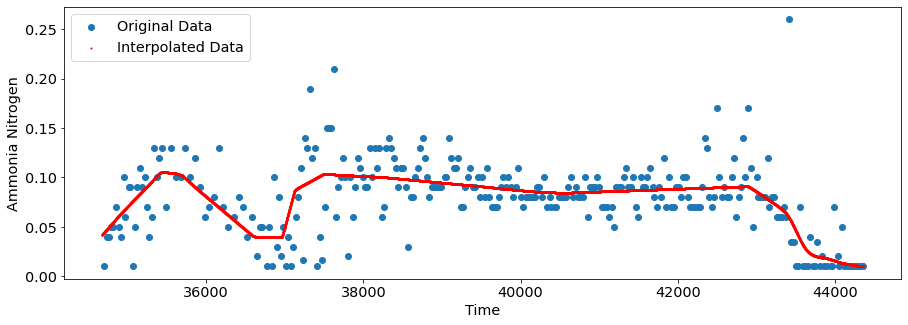

313/313 [==============================] - 0s 335us/step - loss: 2.7112e-16
['loss']


In [3]:
#Transform the normalized scale to real scale
AN_min = 0.01
AN_max = 0.26
time_min = 34708.00   
time_max = 44354.43   

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(AN_max - AN_min) + AN_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, AN*(AN_max - AN_min) + AN_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Ammonia Nitrogen')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [4]:
interpolation = model.predict([0.078681953
,0.084798205
,0.091121788
,0.097445371
,0.103768953
,0.110092536
,0.116519784
,0.122636035
,0.128959618
,0.138496825
,0.141606783
,0.147930366
,0.154357614
,0.160473866
,0.166797448
,0.173121031
,0.179444613
,0.185768196
,0.192195444
,0.198415361
,0.211062526
])
interpolation

array([[0.38124183],
       [0.37968293],
       [0.37796828],
       [0.37328056],
       [0.3644465 ],
       [0.34694406],
       [0.32910365],
       [0.31224838],
       [0.29586238],
       [0.27120355],
       [0.2631609 ],
       [0.24679834],
       [0.23016763],
       [0.21434146],
       [0.197979  ],
       [0.18157017],
       [0.16511881],
       [0.14879686],
       [0.13249695],
       [0.12066745],
       [0.1183089 ]], dtype=float32)

In [5]:
!mkdir -p saved_model
model.save('saved_model\my_modelBB09_AN')

子目录或文件 -p 已经存在。
处理: -p 时出错。
子目录或文件 saved_model 已经存在。
处理: saved_model 时出错。


INFO:tensorflow:Assets written to: saved_model\my_modelBB09_AN\assets
